# APIs
This week we'll be discussing how to get and process data from the web with Application Programming Interfaces.

In [10]:
# This is old
import requests
import json
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime
from bs4 import BeautifulSoup

# These are new
import tweepy

# Load secret keys
with open('api_keys.json') as f:
    api_keys = json.loads(f.read())

## Example 1: Bitcoin
In this example, we'll go through the process of manually querying a Bitcoin API

* You can find the API documentation [here](https://blockchain.info/api)

In [2]:
# Getting exchange rates
# (A simple API with no necessary parameters)
r = requests.get('https://blockchain.info/ticker')
print('status code: ' + str(r.status_code))
r.json()

status code: 200


{'AUD': {'15m': 8585.72,
  'buy': 8586.66,
  'last': 8585.72,
  'sell': 8584.78,
  'symbol': '$'},
 'BRL': {'15m': 21520.58,
  'buy': 21522.93,
  'last': 21520.58,
  'sell': 21518.23,
  'symbol': 'R$'},
 'CAD': {'15m': 8481.15,
  'buy': 8482.08,
  'last': 8481.15,
  'sell': 8480.23,
  'symbol': '$'},
 'CHF': {'15m': 6604.76,
  'buy': 6605.49,
  'last': 6604.76,
  'sell': 6604.04,
  'symbol': 'CHF'},
 'CLP': {'15m': 4181839.2,
  'buy': 4182296.54,
  'last': 4181839.2,
  'sell': 4181381.86,
  'symbol': '$'},
 'CNY': {'15m': 43501.13,
  'buy': 43505.89,
  'last': 43501.13,
  'sell': 43496.38,
  'symbol': '¥'},
 'DKK': {'15m': 42185.74,
  'buy': 42190.36,
  'last': 42185.74,
  'sell': 42181.13,
  'symbol': 'kr'},
 'EUR': {'15m': 5712.18,
  'buy': 5713.04,
  'last': 5712.18,
  'sell': 5711.32,
  'symbol': '€'},
 'GBP': {'15m': 4968.24,
  'buy': 4968.78,
  'last': 4968.24,
  'sell': 4967.69,
  'symbol': '£'},
 'HKD': {'15m': 51355.58,
  'buy': 51361.2,
  'last': 51355.58,
  'sell': 51349.96,

In [3]:
# A more complicated API request
# We can use a parameters dictionary to specify 'arguments' to the API
params = {
    'timespan': '1years',
    'rollingAverage': '1days'
}
r = requests.get('https://api.blockchain.info/charts/estimated-transaction-volume-usd', params=params)
print(r.url)
data = r.json()
data

https://api.blockchain.info/charts/estimated-transaction-volume-usd?timespan=1years&rollingAverage=1days


{'description': 'The Estimated Transaction Value in USD value.',
 'name': 'Estimated USD Transaction Value',
 'period': 'day',
 'status': 'ok',
 'unit': 'USD',
 'values': [{'x': 1478044800, 'y': 169116165.31},
  {'x': 1478131200, 'y': 204145450.34},
  {'x': 1478217600, 'y': 198460199.87},
  {'x': 1478304000, 'y': 123153407.34},
  {'x': 1478390400, 'y': 169183042.94},
  {'x': 1478476800, 'y': 190875054.99},
  {'x': 1478563200, 'y': 209569075.12},
  {'x': 1478649600, 'y': 289544177.64},
  {'x': 1478736000, 'y': 187613065.98},
  {'x': 1478822400, 'y': 152755406.87},
  {'x': 1478908800, 'y': 119400679.08},
  {'x': 1478995200, 'y': 124728414.92},
  {'x': 1479081600, 'y': 168532361.93},
  {'x': 1479168000, 'y': 190622060.17},
  {'x': 1479254400, 'y': 270653443.72},
  {'x': 1479340800, 'y': 249776321.2},
  {'x': 1479427200, 'y': 198644445.34},
  {'x': 1479513600, 'y': 151778076.97},
  {'x': 1479600000, 'y': 128523869.49},
  {'x': 1479686400, 'y': 193256336.36},
  {'x': 1479772800, 'y': 223163

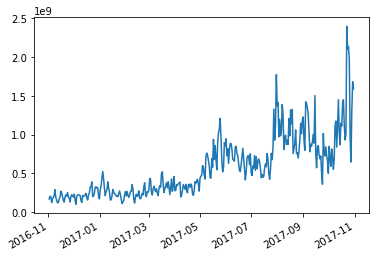

In [4]:
x_values = [datetime.fromtimestamp(t['x']) for t in data['values']]
y_values = [t['y'] for t in data['values']]

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
fig.autofmt_xdate()

## Example 2: Dictionary API (with API key)
* You can read about the DictionaryAPI [here](http://www.dictionaryapi.com/)

In [5]:
# We can write a simple API wrapper function to make using the API easier in the future
def word_definitions(word):
    # Here we'll load in our api key
    params = {
        'key': api_keys['dictionary_api_key']
    }
    # Constructing the full URL
    url = 'http://www.dictionaryapi.com/api/v1/references/collegiate/xml/' + word
    
    # Passing parameters into the request and executing it
    r = requests.get(url, params=params)
    
    # Using BeautifulSoup to parse the XML response (ew, XML...)
    soup = BeautifulSoup(r.text, 'xml')
    
    # Scrape defns from the response
    defs = []
    for e in soup.find_all('entry'):
        defs.append(e.find('dt').text)
    return defs

print("Soup:")
print('\n'.join(word_definitions('soup')))

print("\nDank:") 
print('\n'.join(word_definitions('dank')))


Soup:


KeyError: 'dictionary_api_key'

## Example 3: Twitter with Tweepy
In this example, we'll show an example of accessing an API with a Python wrapper.

* You can read the Tweepy documentation [here](https://tweepy.readthedocs.io/)
* Get an API key by making an app [here](https://apps.twitter.com/)

In [11]:
# Load API keys
consumer_key = api_keys['consumer_key']
consumer_secret = api_keys['consumer_secret']
access_token = api_keys['access_token']
access_token_secret = api_keys['access_token_secret']

# Authenticate Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [12]:
# Do magic
elon = api.get_user('elonmusk')
print('elon is followed by: ' + str(elon.followers_count))
print('elon follows: ' + str(elon.friends_count))

elon is followed by: 14132964
elon follows: 47


In [13]:
elon_tweets = api.user_timeline('elonmusk', count=10)
for t in elon_tweets:
    print(t.text + '\n')
    

RT @SpaceX: Falcon 9 and Koreasat-5A went vertical last night on Pad 39A. Today’s launch window opens at 3:34 p.m. EDT → https://t.co/gtC39…

@uncover007 500 ft so far. Should be 2 miles long in three or four months and hopefully stretch the whole 405 N-S c… https://t.co/BfoqYKJg3u

Picture of The Boring Company LA tunnel taken yesterday https://t.co/TfdVKyXFsJ

Btw, just want to express a word of appreciation for the hard work of the Tesla Gigafactory team. Reason I camped o… https://t.co/Nztp84BSLW

Whiskey, fire, s’mores and JC

Also, hotdog or not hotdog? https://t.co/86cxwbZyWB

Campfire on the Gigafactory roof https://t.co/JKxaKUzvZY

Just feed it The Godfather movies as input. What’s the worst that could happen? https://t.co/WX4Kx45csv

RT @Tesla: Hospital del Niño is first of many solar+storage projects going live. Grateful to support the recovery of Puerto Rico with @rica…

@lorengrush @verge It’s true tho

@verge Groan



In [9]:
# We can also send data to Twitter using Tweepy
tweet = api.update_status("I'm teaching a lecture on APIs. Here's a tweet.")
print(tweet.id)
print(tweet.text)
print(tweet.created_at)


925803112585138176
I'm teaching a lecture on APIs. Here's a tweet.
2017-11-01 19:13:57


In [47]:
# Streaming tweets is a great way of capturing lots of data
# (You can get around the limits of Twitter searching)

# Step 1) We need to create a class that will handle when we get new Tweets
class MyStreamListener(tweepy.StreamListener):
    
    # This method will be called when new tweets come in
    def on_status(self, status):
        print(status.text)

# Step 2) We need to setup a stream and tell Tweepy to send Tweets to our listener
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

# Step 3) Turn on the Tweet Stream and track a particular phrase.
myStream.filter(track=[u'pizza'], async=False)
        

RT @elBENJITO: Order me a dominos pizza pls
Shawn Sherrills Karaoke Parlour Pizza Shack Tickets Minibar Tuesday,  | https://t.co/TLNfkZ5dC9 | #KansasCity https://t.co/5VEyfGmfrZ
RT @lebaenesepapi: Pineapple and non-pineapple pizza eaters must put our differences aside and join forces to defeat this evil https://t.co…
@HiFalutinWays @JulianAssange Found a utube link with key words John podesta pizza gate but it is much too horrific… https://t.co/kCKlx0mkIS
RT @seokjinvenus: when seokjin ordered a pizza and the company paid it for him, his reaction is so cute i’m crying https://t.co/mm7M4Sxgri
RT @J4CKMULL: Pineapple and non pineapple pizza eaters gotta come together to stop this shit https://t.co/YmjuTsQo46
RT @lebaenesepapi: Pineapple and non-pineapple pizza eaters must put our differences aside and join forces to defeat this evil https://t.co…
s2e18: in which Harvey Bullock tries so hard to open Jim’s door that he dents the pizza box he’s carrying
RT @soft_chomps: when u go on a date 

KeyboardInterrupt: 

# Challenges!
**NOTE:** This week's challenges aren't too difficult to implement, but it may be difficult to understand _how_ to implement them. This is intentional. A very important skill in working with APIs is learning how to read and understand the documentation that is provided with them. These challenges will try to help you develope that skillset.

### Challenge 1: Bitcoin Price over time
Write a function that queries the Blockchain API (Example 1) and graphs the USD Market Price of Bitcoin over the last year.
It may be helpful to look at the [Blockchain Charts API documentation](https://blockchain.info/api/charts_api)

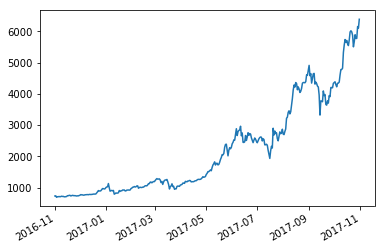

In [15]:
def bitcoin_price():
    r = requests.get("https://api.blockchain.info/charts/market-price?timespan=1year&format=json")
    data = r.json()
    x_values = [datetime.fromtimestamp(t['x']) for t in data['values']]
    y_values = [t['y'] for t in data['values']]

    fig, ax = plt.subplots()
    ax.plot(x_values, y_values)
    fig.autofmt_xdate()

bitcoin_price()

### Challenge 2: Creator of Liked Tweets
Given a user, write a function that will return a list of the users that wrote the last 100 tweets that the input user has liked.

**Note:** You'll need a set of Twitter credentials to complete this challenge. (Just make a throwaway account, and create an app at https://apps.twitter.com/ to get your set of API credentials)


In [16]:
def liked_tweet_creators(user):
    favorites = []
    for i in range(0,5):
        user_favorites = (api.favorites(user))
        for element in user_favorites:
            favorites.append(element.author.screen_name)
    if 100 > len(favorites):
        return favorites[0:len(favorites)]
    return favorites[0:100]
    

print (liked_tweet_creators('kennethreitz')) # Author of requests
print (liked_tweet_creators('mitsuhiko')) # Author of Flask

['PeterSanchez', 'hiimtaylorjones', 'offby1', 'sarangbk', 'Gulopine', 'offby1', 'zoocat', 'mitsuhiko', 'Ocramius', 'gekitsuu', 'dbader_org', 'gekitsuu', 'supercub666', 'shimst3r', 'neirbowj', 'gamesbrainiac', 'tef_ebooks', 'Big_in_VA', 'tartley', 'quinnnorton', 'PeterSanchez', 'hiimtaylorjones', 'offby1', 'sarangbk', 'Gulopine', 'offby1', 'zoocat', 'mitsuhiko', 'Ocramius', 'gekitsuu', 'dbader_org', 'gekitsuu', 'supercub666', 'shimst3r', 'neirbowj', 'gamesbrainiac', 'tef_ebooks', 'Big_in_VA', 'tartley', 'quinnnorton', 'PeterSanchez', 'hiimtaylorjones', 'offby1', 'sarangbk', 'Gulopine', 'offby1', 'zoocat', 'mitsuhiko', 'Ocramius', 'gekitsuu', 'dbader_org', 'gekitsuu', 'supercub666', 'shimst3r', 'neirbowj', 'gamesbrainiac', 'tef_ebooks', 'Big_in_VA', 'tartley', 'quinnnorton', 'PeterSanchez', 'hiimtaylorjones', 'offby1', 'sarangbk', 'Gulopine', 'offby1', 'zoocat', 'mitsuhiko', 'Ocramius', 'gekitsuu', 'dbader_org', 'gekitsuu', 'supercub666', 'shimst3r', 'neirbowj', 'gamesbrainiac', 'tef_ebo

### Challenge 3: Stream Saver

Write a function, or set of functions, that takes as an argument a list of search terms and opens a Tweet stream with those search terms. The function should filter out any tweets that are retweets of other tweets, and should filter out any tweets that are `@` replies to other users (the only tweets that we care about are 'original' tweets). As each tweet comes in, append it to a `csv` file specified by `filename` (Note, you have to create this file if it doesn't exist)

For each tweet, save the following information:
* Tweet content (text)
* The user that wrote the tweet
* When the tweet was created
* The 'tweet id' of the tweet

(See Challange 2 for note about Twitter Credentials)

In [31]:
import csv


def stream_saver(search_terms, filename):  
    class MyStreamListener(tweepy.StreamListener):
    
        def on_status(self, status):
            if status.text[0:2] != 'RT' and status.text[1:3] != 'RT' and status.in_reply_to_status_id == None:
                with open(filename, 'a') as f:
                    writer = csv.writer(f)
                    writer.writerow([status.text, status.author.screen_name, status.created_at,
                                    status.id])
                    print([status.text, status.author.screen_name, status.created_at,
                                    status.id])


    myStreamListener = MyStreamListener()
    myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

    myStream.filter(track=search_terms, async = False)
    
stream_saver(['SpaceX','Elon Musk'], 'TwitterStream.csv')

['Did you know that Elon Musk is starting yet another company? This time, he wants to tackle the human brain...\n\nhttps://t.co/3ukYQqaWwg', 'ErinLavoie__', datetime.datetime(2017, 11, 1, 20, 2, 12), 925815255300755458]


KeyboardInterrupt: 

In [33]:
import tweepy
def stream_saver(search_terms, filename): 
    #override tweepy.StreamListener to add logic to on_status
    # Load API keys
    consumer_key = api_keys['consumer_key']
    consumer_secret = api_keys['consumer_secret']
    access_token = api_keys['access_token']
    access_token_secret = api_keys['access_token_secret']

    # Authenticate Tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    class MyStreamListener(tweepy.StreamListener):
        def on_status(self, status):
            if (status.text[0:2] != ('RT') and status.text[1:3] != ('RT') and status.in_reply_to_status_id == None):
                with open(filename, 'a') as f:
                    filewriter = csv.writer(f)
                    filewriter.writerow([status.text,status.author.screen_name,status.created_at,status.id])
                    print([status.text,status.author.screen_name,status.created_at,status.id])

    myStreamListener = MyStreamListener()
    myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

    myStream.filter(track=search_terms, async = False)
    
stream_saver(["basketball"],"filename.csv")

['🏀 La Vasto Basket nel finale batte il Magic Basket Chieti 84-85 e resta prima... #basket #basketball https://t.co/n3ZeVt2Npo', 'BasketNewsItaly', datetime.datetime(2017, 11, 1, 20, 6, 38), 925816372294246410]
['sign up for winter sports are tomorrow and i really want to do basketball cheer!! i’ve done it most of my life but i don’t like the way...', 'cammorynn', datetime.datetime(2017, 11, 1, 20, 6, 40), 925816380728979456]
['These Founders Create The Only Way You Should Carry a Basketball https://t.co/xEaYvyV3WE https://t.co/WO4qhcFDPg', 'StrictlyBrickly', datetime.datetime(2017, 11, 1, 20, 6, 42), 925816388509454337]
['lebron is simultaneously the best basketball player in the world and also the cutest person over 6\'5"', 'lmScampi', datetime.datetime(2017, 11, 1, 20, 6, 48), 925816414426017794]
['Jeremy Dixon: Math Teacher and Basketball Coach (@ClimberHoops) at Urbana HS. Dad to 4 and Husband to 1 (she’s awesome) #ucsteach', 'JD30Dad4', datetime.datetime(2017, 11, 1, 20, 6, 49), 

KeyboardInterrupt: 

## Bonus Challenge (Totally Optional)
#### (Worth a maximum of 2 extra points)

Write a function or set of functions that:
1. Finds the [Twitch]() channel that currently has the most number of live viewers.
2. Enters that Twitch channels chat.
3. Saves the chat to a csv file, saving username, message text, and message time data.

You may use any python API wrappers or helper modules that you may find useful. The Twitch developer page will also be helpful (https://dev.twitch.tv/)